# Twitter ETL Football Project

### Data source

- The data is pulled from the Twitter API and is saved into a csv file.

### Importing libraries

In [50]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import datetime

pio.templates.default = 'ggplot2'
pio.renderers.default = "svg"

#### Importing data

In [17]:
df = pd.read_csv('data/tweets.csv', parse_dates=['created_at'], index_col=0)

df.head()

,attachments,author_id,created_at,edit_history_tweet_ids,id,lang,text,retweet_count,reply_count,like_count,quote_count,impression_count
0,{'media_keys': ['3_1601314181004857345']},155659213,2022-12-09 20:33:47+00:00,[1601314186554138624],1.601310e+18,pt,Há um Mundial que Portugal já ganhou: o dos ad...,21361,18135,315094,2726,0
0,{'media_keys': ['7_1477700130161713154']},155659213,2022-01-02 17:55:48+00:00,[1477700166236921861],1.477700e+18,en,Enjoyed being the world's first mask-changing ...,21361,18135,315094,2726,0
1,{'media_keys': ['3_1600839908800843777']},155659213,2022-12-08 13:09:12+00:00,[1600839914719178753],1.600840e+18,pt,Um grupo demasiado unido para ser quebrado por...,31143,7329,367080,2715,0
2,{'media_keys': ['3_1599468027782828032']},155659213,2022-12-04 18:17:56+00:00,[1599468060301148162],1.599470e+18,und,🇵🇹🙏🏽💪🏽 https://t.co/JojzIfF3F4,24274,9099,506086,1731,0
3,{'media_keys': ['3_1598737889583665178']},155659213,2022-12-02 17:56:36+00:00,[1598737914883706890],1.598740e+18,pt,Primeiros dois objectivos alcançados: apuramen...,12165,3827,222085,551,0


#### Data cleaning

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 30
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   attachments             213 non-null    object             
 1   author_id               287 non-null    int64              
 2   created_at              287 non-null    datetime64[ns, UTC]
 3   edit_history_tweet_ids  287 non-null    object             
 4   id                      287 non-null    float64            
 5   lang                    287 non-null    object             
 6   text                    287 non-null    object             
 7   retweet_count           287 non-null    int64              
 8   reply_count             287 non-null    int64              
 9   like_count              287 non-null    int64              
 10  quote_count             287 non-null    int64              
 11  impression_count        287 non-null    int64 

In [19]:
df['has_image'] = np.where(df['attachments'].isna(), False, True)

df = df.drop('attachments', axis='columns')

In [20]:
# Indicating start of World Cup
df['wc_start'] = np.where(df['created_at'] >= '2022-11-20', True, False)

In [51]:
df['month'] = df['created_at'].dt.month

In [21]:
name_conditions = [df.author_id.eq(155659213), df.author_id.eq(158487331), df.author_id.eq(1725137533)]
name_choices = ['Ronaldo', 'Neymar', 'Mbappe']

df['name'] = np.select(name_conditions, name_choices)

In [22]:
df = df.sort_values(by=['author_id', 'created_at'], ascending=True)

In [52]:
df.head()

,author_id,created_at,edit_history_tweet_ids,id,lang,text,retweet_count,reply_count,like_count,quote_count,impression_count,has_image,wc_start,name,month
0,155659213,2022-01-02 17:55:48+00:00,[1477700166236921861],1.477700e+18,en,Enjoyed being the world's first mask-changing ...,21361,18135,315094,2726,0,True,False,Ronaldo,1
99,155659213,2022-01-11 11:25:30+00:00,[1480863436292694025],1.480860e+18,en,Good morning 🏃🏻‍♂️☀️😀 https://t.co/SHjiA8NbCX,19450,10014,504803,2975,0,True,False,Ronaldo,1
98,155659213,2022-01-17 13:59:21+00:00,[1483076476996136961],1.483080e+18,en,The winners are…. 🤷🏽‍♂️😅 💪🏽 https://t.co/7uvKY...,15346,6342,323553,3866,0,True,False,Ronaldo,1
97,155659213,2022-01-19 22:38:01+00:00,[1483931781938221061],1.483930e+18,en,3 important points! well done lads 💪🏽👏🏽 https:...,14894,4776,254983,757,0,True,False,Ronaldo,1
96,155659213,2022-01-25 13:44:03+00:00,[1485971731697344518],1.485970e+18,en,Enjoy the view 😎 https://t.co/w78enMjxPH,18048,6688,391166,2710,0,True,False,Ronaldo,1


In [24]:
df.to_csv('data/tweets_formatted.csv')

### Analysis and Charts

In [25]:
df = pd.read_csv('data/tweets_formatted.csv', parse_dates=['created_at'], index_col=0)

In [28]:
most_liked = df[['name', 'created_at', 'text', 'like_count', 'wc_start']].copy()

most_liked.sort_values(by='like_count', ascending=False).head(10)

,name,created_at,text,like_count,wc_start
5,Neymar,2022-12-18 18:59:49+00:00,Felicidades Hermano 👏🏽 #leomessi https://t.co/...,2648740,True
2,Mbappe,2022-12-19 10:19:55+00:00,Nous reviendrons. 🇫🇷🙏🏽 https://t.co/Ni2WhO6Tgd,2331342,True
0,Mbappe,2022-12-29 19:23:14+00:00,The king of football has left us but his legac...,2308355,True
1,Mbappe,2022-12-20 21:51:45+00:00,24 🎉🎂\nMerci à tous pour vos messages. 🥰 https...,2070238,True
71,Ronaldo,2022-04-30 09:51:13+00:00,Forever Love…❤️🙏🏽 https://t.co/x18W34rYRM,2002143,False
74,Ronaldo,2022-04-18 18:23:06+00:00,https://t.co/vRNVCoegOW,1894597,False
13,Ronaldo,2022-11-19 17:55:15+00:00,Victory is a State of Mind. A long tradition o...,1753643,False
73,Ronaldo,2022-04-23 16:19:07+00:00,❤️ https://t.co/HLg0RbI8SM,1651756,False
3,Mbappe,2022-12-14 23:22:01+00:00,"Don’t be sad bro, everybody is proud of what y...",1306280,True
4,Mbappe,2022-12-14 21:46:34+00:00,BACK TO BACK WORLD CUP FINAL. 🇫🇷,1220394,True


The most liked tweets were during/after the 2022 World Cup.

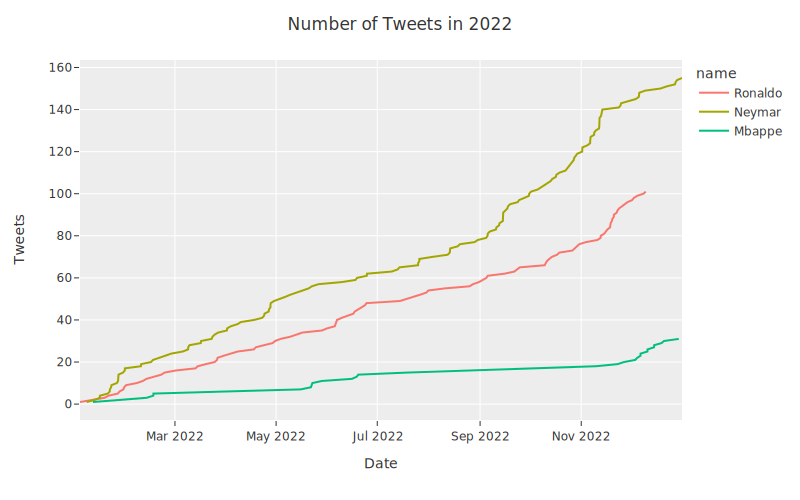

In [56]:
df1 = df[['created_at', 'name']].copy()
df1 = df1.assign(cumulative_count = df1.groupby(by=['name'], as_index=False).cumcount()+1)

fig1 = px.line(
    df1, 
    x='created_at', 
    y='cumulative_count', 
    color='name'
)
fig1.update_layout(
    width=800,
    height=500,
    title='Number of Tweets in 2022',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Tweets')
)
fig1.show()

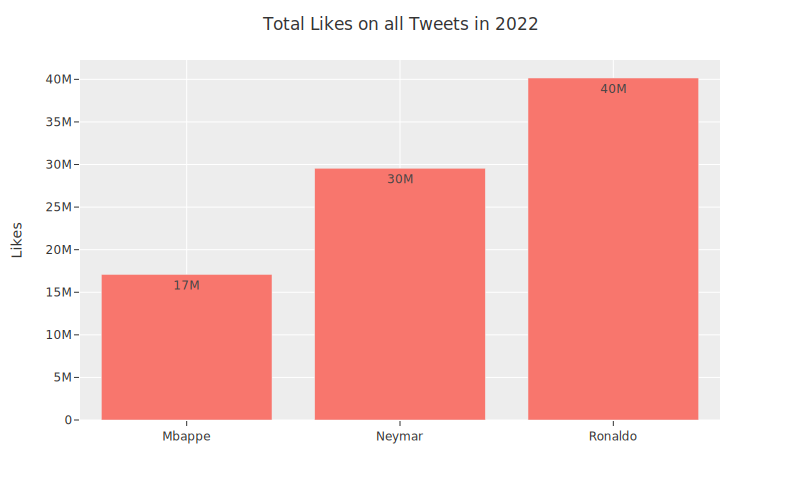

In [59]:
df2 = df[['name', 'like_count']].copy()
df2 = df2.groupby([df2.name], as_index=False).sum()

fig2 = px.bar(
    df2, 
    x='name', 
    y='like_count', 
    orientation='v',
    text_auto='.2s'
)
fig2.update_layout(
    width=800,
    height=500,
    title='Total Likes on all Tweets in 2022',
    xaxis=None,
    yaxis=dict(title='Likes')
)
fig2.update_traces(
    textfont_size=12, 
    textangle=0,
    cliponaxis=False
    )
fig2.show()

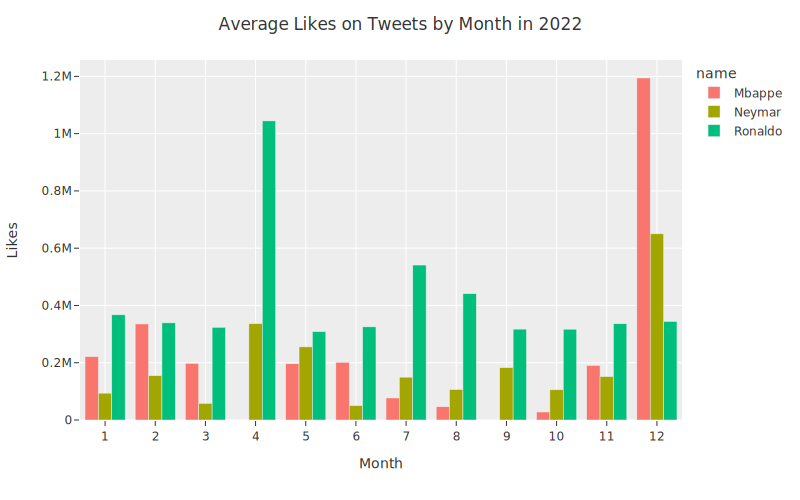

In [75]:
df3 = df[['name', 'month', 'like_count']].copy()
df3 = df3.groupby([df3.name, df3.month], as_index=False).mean()

fig3 = px.bar(
    df3, 
    x='month', 
    y='like_count', 
    color='name',
    barmode='group'
)
fig3.update_layout(
    width=800,
    height=500,
    title='Average Likes on Tweets by Month in 2022',
    xaxis=dict(title='Month', tickmode='linear'),
    yaxis=dict(title='Likes')
)
fig3.show()

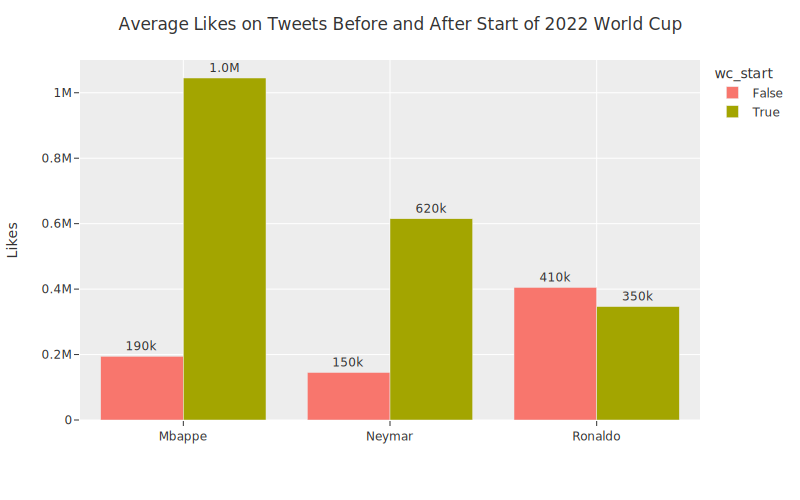

In [76]:
df5 = df[['name', 'like_count', 'wc_start']].copy()
df5 = df5.groupby([df5.name, df5.wc_start], as_index=False).mean()

fig5 = px.bar(
    df5,
    x='name',
    y='like_count',
    color='wc_start',
    barmode='group',
    text_auto='.2s'
)
fig5.update_layout(
    width=800,
    height=500,
    title='Average Likes on Tweets Before and After Start of 2022 World Cup',
    xaxis=None,
    yaxis=dict(title='Likes')
)
fig5.update_traces(
    textfont_size=12, 
    textangle=0,
    textposition="outside",
    cliponaxis=False
)

fig5.show()